# Splityield example

In [52]:
#!pip install rpy2

In [53]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri

# Activate automatic conversion between pandas and R data frames
pandas2ri.activate()

## Importing data with pandas

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

df = pd.read_csv('data/splityield.txt', sep="\\t", engine="python")

# Display the first few rows
df

,yield,block,irrigation,density,fertilizer
0,90,A,control,low,N
1,95,A,control,low,P
2,107,A,control,low,NP
3,92,A,control,medium,N
4,89,A,control,medium,P
...,...,...,...,...,...
67,131,D,irrigated,medium,P
68,126,D,irrigated,medium,NP
69,116,D,irrigated,high,N
70,136,D,irrigated,high,P


<Axes: >

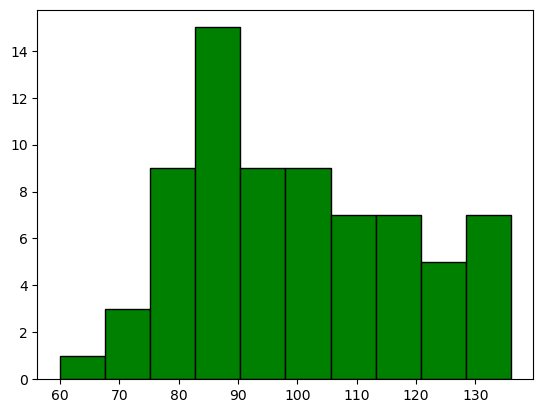

In [55]:
# inspecting yield
df["yield"].hist(bins=10, color="green", edgecolor="black", grid=False)

## importing specific R packages

In [33]:
nlme = importr('nlme')
multcomp = importr('multcomp')

In [31]:
#Converting Python dataframe to R dataframe
r_df = pandas2ri.py2rpy(df)

In [57]:
# printing column yield
print(r_df.rx2('yield'))

 [1]  90  95 107  92  89  92  81  92  93  80  87 100 121 110 119  78  98 122  83
[20]  80  95  98  98 106  74  81  74 102 109 105  99  94 123 136 133 132  85  88
[39]  88 112 104  91  82  78  94  60 104 114  90 118 113 119 122 136  86  78  89
[58]  79  86  87  85  89  83  73 114 114 109 131 126 116 136 133



In [58]:
#printing R dataframe
print(r_df)

   yield block irrigation density fertilizer
0     90     A    control     low          N
1     95     A    control     low          P
2    107     A    control     low         NP
3     92     A    control  medium          N
4     89     A    control  medium          P
5     92     A    control  medium         NP
6     81     A    control    high          N
7     92     A    control    high          P
8     93     A    control    high         NP
9     80     A  irrigated     low          N
10    87     A  irrigated     low          P
11   100     A  irrigated     low         NP
12   121     A  irrigated  medium          N
13   110     A  irrigated  medium          P
14   119     A  irrigated  medium         NP
15    78     A  irrigated    high          N
16    98     A  irrigated    high          P
17   122     A  irrigated    high         NP
18    83     B    control     low          N
19    80     B    control     low          P
20    95     B    control     low         NP
21    98  

## Creating data frame with different models and aic

In [105]:
formulas = ['yield ~ irrigation + density + fertilizer',
            'yield ~ irrigation*density+fertilizer',
            'yield ~ irrigation*density+irrigation*fertilizer',
            'yield ~ (irrigation + density + fertilizer)^2', 
            'yield ~ irrigation * density * fertilizer']
aic_df = pd.DataFrame(columns=[["model", "aic"]])
summaries = []
fitted_values = []
cftests = []

In [106]:
for i in range(len(formulas)):

    model = nlme.lme(
        fixed=ro.Formula(formulas[i]),
        random=ro.Formula('~ 1 | block/irrigation/density'),
        data=r_df,
    )

    summary = ro.r.summary(model)

    # Get the model summary
    summaries.append(summary)

    aic_df.loc[i,"model"] = formulas[i].split(' ~ ')[1]
    aic_df.loc[i,"aic"] = summary.rx2('AIC')

    fitted_values.append(ro.r.fitted(model))
    cftest_result = multcomp.cftest(model)
    cftests.append(r.summary(cftest_result))

In [107]:
aic_df

,model,aic
0,irrigation + density + fertilizer,554.39669
1,irrigation*density+fertilizer,536.564904
2,irrigation*density+irrigation*fertilizer,519.903471
3,(irrigation + density + fertilizer)^2,503.125576
4,irrigation * density * fertilizer,481.621202


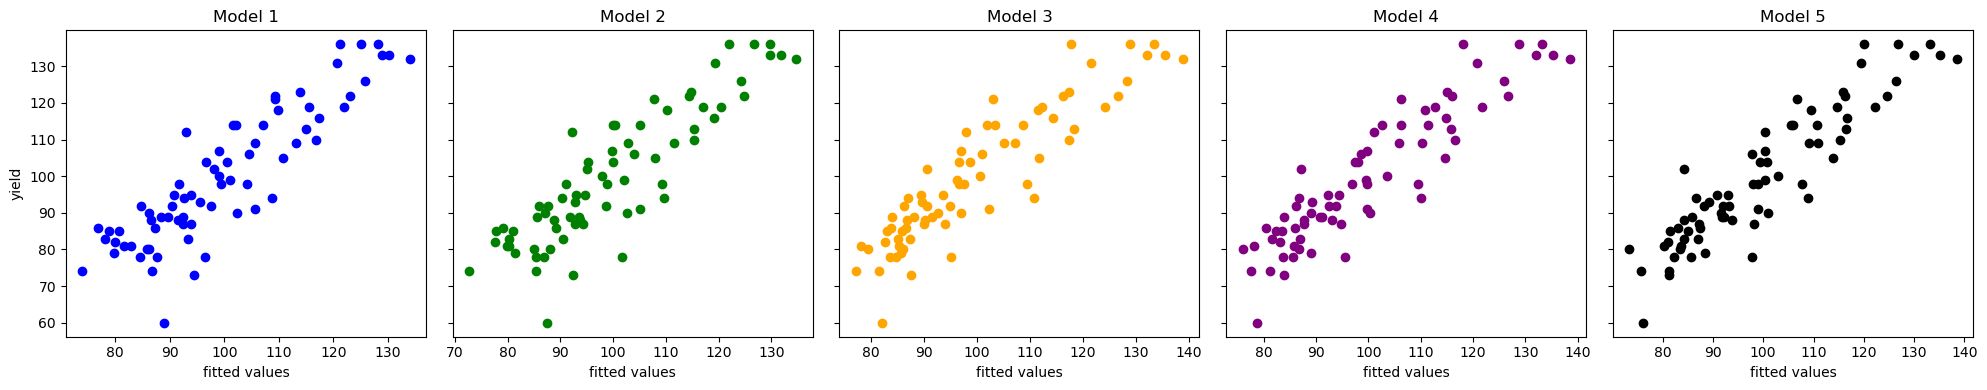

In [123]:
fig, axes = plt.subplots(1, len(fitted_values), figsize=(20, 4), sharey=True) 
colors = ["blue", "green", "orange", "purple", "black", "gray", "yellow", "red"]

for i, ax in enumerate(axes):
    ax.scatter(fitted_values[i].tolist(), df["yield"], color=colors[i])
    ax.set_title(f"Model {i+1}")
    ax.set_xlabel("fitted values")
    if i == 0:  # Add y-axis label only to the first subplot
        ax.set_ylabel("yield")

plt.tight_layout()
plt.show()

In [114]:
print(summaries[3])

Linear mixed-effects model fit by REML
  Data: structure(list(yield = c(90L, 95L, 107L, 92L, 89L, 92L, 81L,  92L, 93L, 80L, 87L, 100L, 121L, 110L, 119L, 78L, 98L, 122L, 83L,  80L, 95L, 98L, 98L, 106L, 74L, 81L, 74L, 102L, 109L, 105L, 99L,  94L, 123L, 136L, 133L, 132L, 85L, 88L, 88L, 112L, 104L, 91L,  82L, 78L, 94L, 60L, 104L, 114L, 90L, 118L, 113L, 119L, 122L,  136L, 86L, 78L, 89L, 79L, 86L, 87L, 85L, 89L, 83L, 73L, 114L,  114L, 109L, 131L, 126L, 116L, 136L, 133L), block = c("A", "A",  "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A",  "A", "A", "A", "B", "B", "B", "B", "B", "B", "B", "B", "B", "B",  "B", "B", "B", "B", "B", "B", "B", "B", "C", "C", "C", "C", "C",  "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", "C",  "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", "D",  "D", "D", "D", "D", "D"), irrigation = c("control", "control",  "control", "control", "control", "control", "control", "control",  "control", "irrigated", "irrigated", "irrigated"

In [113]:
print(cftests[3])


	 Simultaneous Tests for General Linear Hypotheses

Fit: lme.formula(fixed = yield ~ (irrigation + density + fertilizer)^2, 
    data = list(yield = c(90L, 95L, 107L, 92L, 89L, 92L, 81L, 
    92L, 93L, 80L, 87L, 100L, 121L, 110L, 119L, 78L, 98L, 122L, 
    83L, 80L, 95L, 98L, 98L, 106L, 74L, 81L, 74L, 102L, 109L, 
    105L, 99L, 94L, 123L, 136L, 133L, 132L, 85L, 88L, 88L, 112L, 
    104L, 91L, 82L, 78L, 94L, 60L, 104L, 114L, 90L, 118L, 113L, 
    119L, 122L, 136L, 86L, 78L, 89L, 79L, 86L, 87L, 85L, 89L, 
    83L, 73L, 114L, 114L, 109L, 131L, 126L, 116L, 136L, 133L), 
        block = c("A", "A", "A", "A", "A", "A", "A", "A", "A", 
        "A", "A", "A", "A", "A", "A", "A", "A", "A", "B", "B", 
        "B", "B", "B", "B", "B", "B", "B", "B", "B", "B", "B", 
        "B", "B", "B", "B", "B", "C", "C", "C", "C", "C", "C", 
        "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", "C", 
        "C", "D", "D", "D", "D", "D", "D", "D", "D", "D", "D", 
        "D", "D", "D", "D", "D", "D", "D"